In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from zipfile import ZipFile
zf=ZipFile('/content/drive/MyDrive/AllAboutDataScience/Final Tetris/archive (8).zip')
zf.extractall('/content')
zf.close()

In [4]:
df=pd.read_csv('/content/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [5]:
df.isnull().sum()/len(df)
# Tidak ada kekosongan feature >30% populasi

Date                           0.000000
Location ISO Code              0.000000
Location                       0.000000
New Cases                      0.000000
New Deaths                     0.000000
New Recovered                  0.000000
New Active Cases               0.000000
Total Cases                    0.000000
Total Deaths                   0.000000
Total Recovered                0.000000
Total Active Cases             0.000000
Location Level                 0.000000
City or Regency                1.000000
Province                       0.029505
Country                        0.000000
Continent                      0.000000
Island                         0.029505
Time Zone                      0.029505
Special Status                 0.856473
Total Regencies                0.000000
Total Cities                   0.028218
Total Districts                0.000000
Total Urban Villages           0.028356
Total Rural Villages           0.029505
Area (km2)                     0.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [7]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [8]:
df.columns=['_'.join(i.lower().split(' ')) for i in df.columns]

In [9]:
df.columns

Index(['date', 'location_iso_code', 'location', 'new_cases', 'new_deaths',
       'new_recovered', 'new_active_cases', 'total_cases', 'total_deaths',
       'total_recovered', 'total_active_cases', 'location_level',
       'city_or_regency', 'province', 'country', 'continent', 'island',
       'time_zone', 'special_status', 'total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)', 'population', 'population_density', 'longitude',
       'latitude', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [10]:
feature=['location', 'new_cases', 'new_deaths',
       'new_recovered', 'new_active_cases', 'total_cases',
       'total_recovered', 'total_active_cases']
label=['total_deaths']

In [11]:
df.drop_duplicates(subset=feature, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21123 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         21123 non-null  object 
 1   location_iso_code            21123 non-null  object 
 2   location                     21123 non-null  object 
 3   new_cases                    21123 non-null  int64  
 4   new_deaths                   21123 non-null  int64  
 5   new_recovered                21123 non-null  int64  
 6   new_active_cases             21123 non-null  int64  
 7   total_cases                  21123 non-null  int64  
 8   total_deaths                 21123 non-null  int64  
 9   total_recovered              21123 non-null  int64  
 10  total_active_cases           21123 non-null  int64  
 11  location_level               21123 non-null  object 
 12  city_or_regency              0 non-null      float64
 13  province        

In [13]:
df[feature+label].describe().apply(lambda x:round(x,4))

,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_recovered,total_active_cases,total_deaths
count,21123.0000,21123.0000,21123.0000,21123.0000,2.112300e+04,2.112300e+04,21123.0000,21123.0000
mean,403.0752,13.6185,388.6716,0.7851,8.777187e+04,7.897697e+04,6068.0783,2726.8216
std,2104.4245,77.5906,2027.8475,951.2190,3.737301e+05,3.452273e+05,27910.7755,11943.1212
min,0.0000,0.0000,0.0000,-25725.0000,1.000000e+00,0.000000e+00,-2306.0000,0.0000
25%,8.0000,0.0000,5.0000,-18.0000,2.277500e+03,1.341000e+03,217.0000,65.0000
50%,44.0000,1.0000,34.0000,1.0000,1.148500e+04,9.300000e+03,986.0000,305.0000
75%,158.0000,5.0000,150.0000,28.0000,3.830800e+04,3.391200e+04,2694.5000,1084.5000
max,56757.0000,2069.0000,48832.0000,36726.0000,4.257243e+06,4.105680e+06,574135.0000,143858.0000


In [14]:
df['location'].value_counts()

DKI Jakarta                   641
Indonesia                     640
Jawa Barat                    637
Banten                        637
Jawa Tengah                   633
Jawa Timur                    625
Daerah Istimewa Yogyakarta    623
Sulawesi Selatan              622
Bali                          618
Kalimantan Timur              617
Riau                          615
Sumatera Utara                613
Kalimantan Tengah             612
Sumatera Selatan              611
Kalimantan Selatan            610
Sumatera Barat                609
Kepulauan Riau                609
Nusa Tenggara Barat           607
Lampung                       605
Sulawesi Utara                604
Sulawesi Tenggara             599
Sulawesi Tengah               598
Papua                         595
Kalimantan Barat              595
Kalimantan Utara              592
Kepulauan Bangka Belitung     590
Papua Barat                   588
Maluku                        587
Sulawesi Barat                584
Maluku Utara  

In [15]:
feature_test=feature.copy()

In [16]:
feature_test.remove('location')

# Outlier Handling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

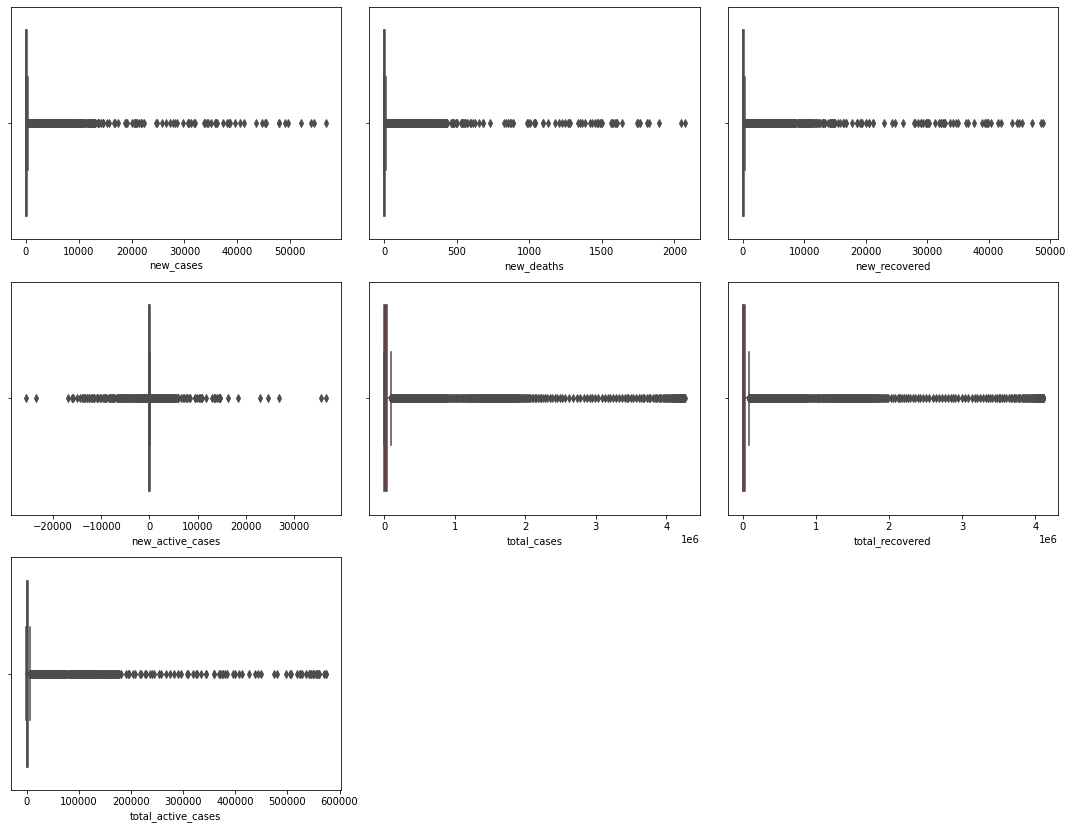

In [17]:
plt.figure(figsize=(15,15))
plt.title('Checking Boxplot untuk Numerical Feature' , fontsize=20)
for i in range(len(feature_test)):
  plt.subplot(4,3,i+1)
  sns.boxplot(df[feature_test[i]], color='r')
  plt.tight_layout()
plt.show()
# Kesimpulan dari boxplot ini adalah untuk outlier handling akan menggunakan 
# metode z-score dikarenakan banyak variasi ukuran IQR
# Dan juga seluruh feature numerikal mengalami outlier

In [18]:
from scipy import stats

In [22]:
filtering=np.array(True*len(df))
for i in range(len(feature_test)):
  score=abs(stats.zscore(df[feature_test[i]]))
  filtering=(score<3) & filtering
df_new=df[filtering]


In [25]:
df_new['date']=pd.to_datetime(df_new['date'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20587 entries, 0 to 21757
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         20587 non-null  datetime64[ns]
 1   location_iso_code            20587 non-null  object        
 2   location                     20587 non-null  object        
 3   new_cases                    20587 non-null  int64         
 4   new_deaths                   20587 non-null  int64         
 5   new_recovered                20587 non-null  int64         
 6   new_active_cases             20587 non-null  int64         
 7   total_cases                  20587 non-null  int64         
 8   total_deaths                 20587 non-null  int64         
 9   total_recovered              20587 non-null  int64         
 10  total_active_cases           20587 non-null  int64         
 11  location_level               20587 non-nu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Data Visualization

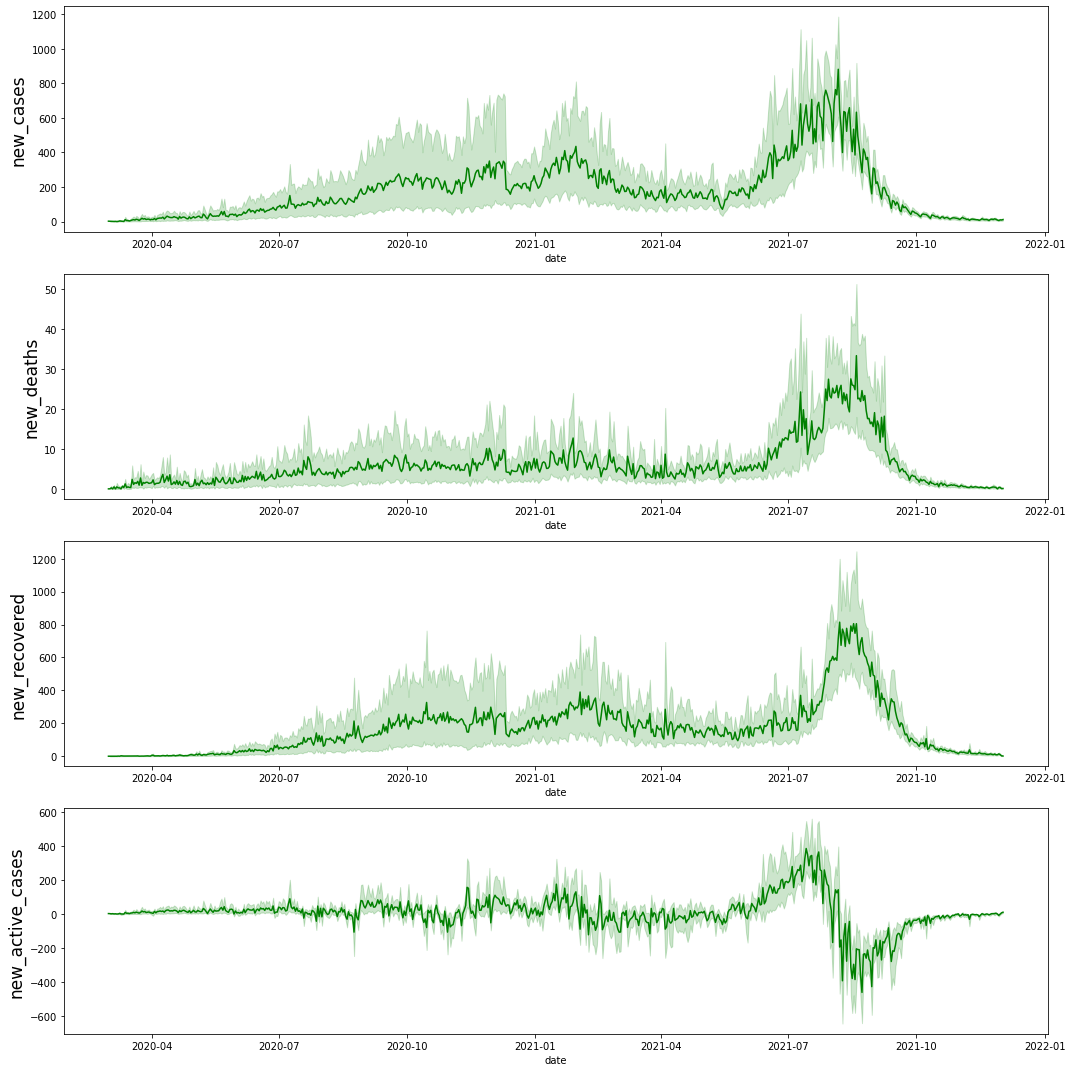

<Figure size 432x288 with 0 Axes>

In [109]:
plt.figure(figsize=(15,15))
for i in range(1,5):
  plt.subplot(4,1,i)
  sns.lineplot(x=df_new['date'], y=df_new[feature[i]], color='green')
  plt.ylabel(feature[i], fontsize=17)
  plt.tight_layout()
plt.show()
plt.savefig('pertumbuhan kasus 2020.png')

Diketahui bahwasannya dari tahun ke tahun didapati bahwa terjadi fluktuatif yang cukup besar pada bulan ke 7 hingga ke 9 namun ketika akan memasuki bulan ke 10 terjadi reduksi jumlah kasus baru termasuk kasus kematian, covered, dan new active case

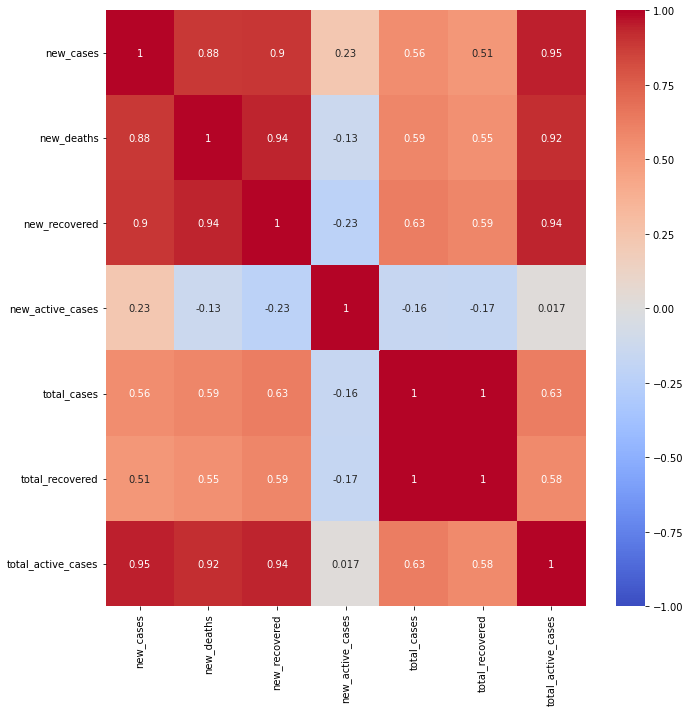

<Figure size 432x288 with 0 Axes>

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df[feature].corr(), vmin=-1, vmax=1,annot=True,cmap='coolwarm')
plt.tight_layout()
plt.show()
plt.savefig('Heatmap Korelasi Feature')

In [51]:
feature[5:8]

['total_cases', 'total_recovered', 'total_active_cases']

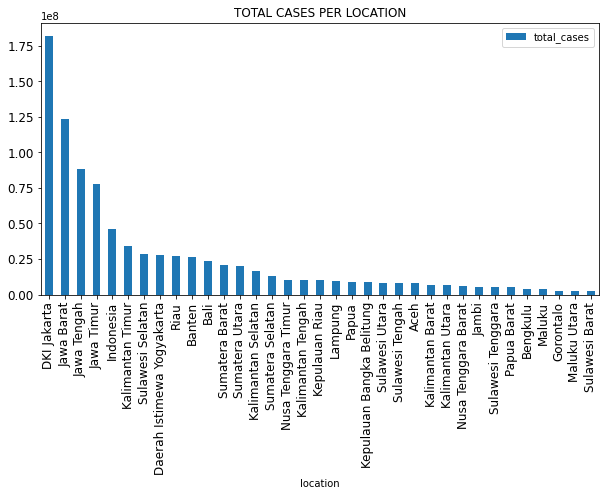

<Figure size 432x288 with 0 Axes>

In [108]:
# Plot Total Cases per Location
df_new.groupby('location', as_index=False)['total_cases'].\
sum().sort_values('total_cases', ascending=False).plot(x='location', y='total_cases', kind='bar', title='TOTAL CASES PER LOCATION',
                                                       figsize=(10,5),fontsize=12)
plt.show()
plt.savefig('total case per location')

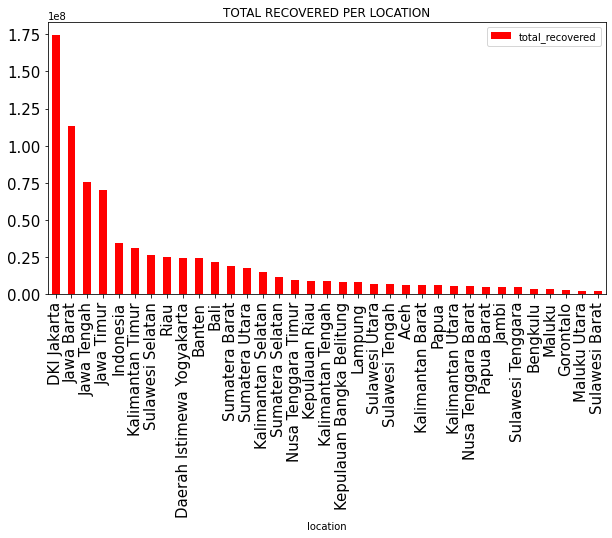

<Figure size 432x288 with 0 Axes>

In [110]:
# Plot Total Recovered per Location
df_new.groupby('location', as_index=False)['total_recovered'].\
sum().sort_values('total_recovered', ascending=False).plot(x='location', y='total_recovered', kind='bar', title='TOTAL RECOVERED PER LOCATION',
                                                       figsize=(10,5), color='r',fontsize=15)
plt.show()
plt.savefig('total recovered per location')

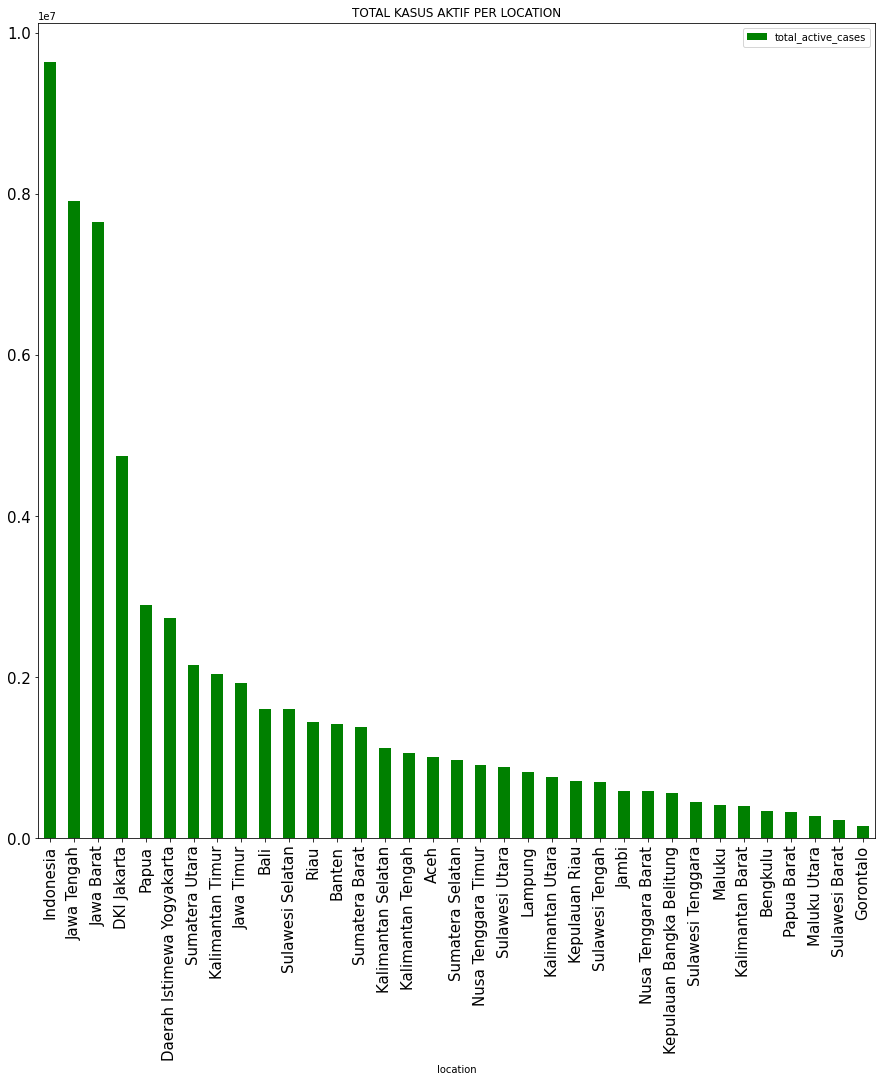

<Figure size 432x288 with 0 Axes>

In [102]:
# Plot Total Active Cases per Location
df_new.groupby('location', as_index=False)['total_active_cases'].\
sum().sort_values('total_active_cases', ascending=False).plot(x='location', y='total_active_cases', kind='bar', title='TOTAL KASUS AKTIF PER LOCATION',
                                                       figsize=(15,15), color='green', fontsize=15)
plt.show()
plt.savefig('total kasus aktif per location1')